# EcoFOCIpy ADCP QC - 19BSP-5A

- mostly remove >200 cm/s flows in u/v


In [1]:
import xarray as xa
import numpy as np

import matplotlib.pyplot as plt

from EcoFOCIpy.plots import TimeSeriesStickPlot

In [3]:
xdf = xa.load_dataset('19bsp5a_velein_0057m.nc')

/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)
/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)
/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)
/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xtick

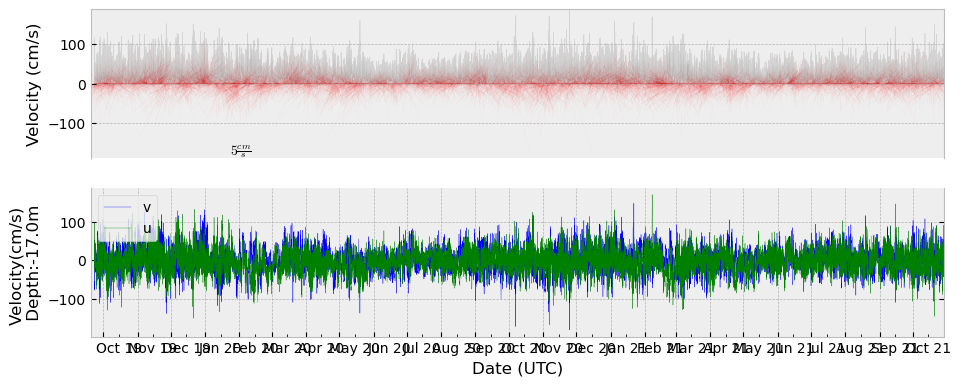

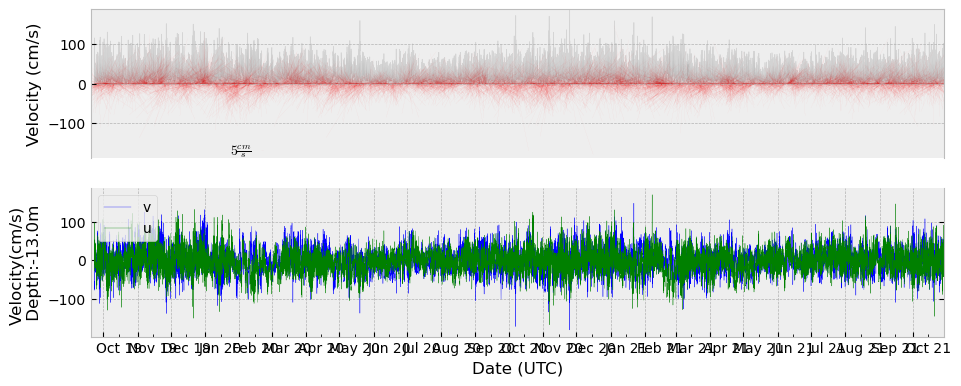

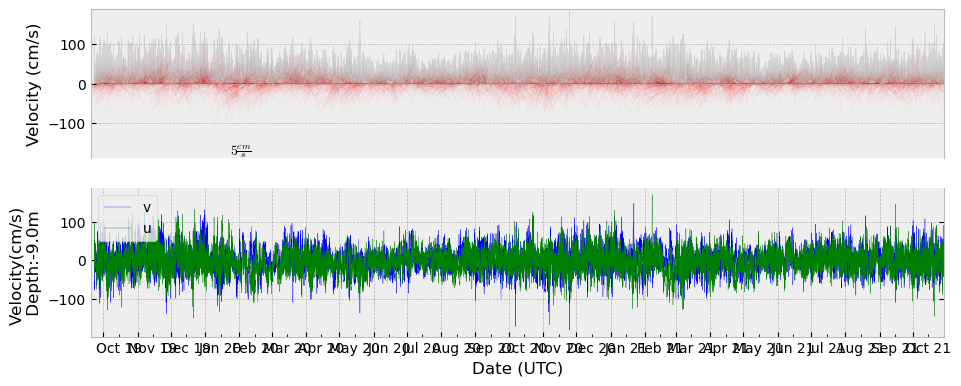

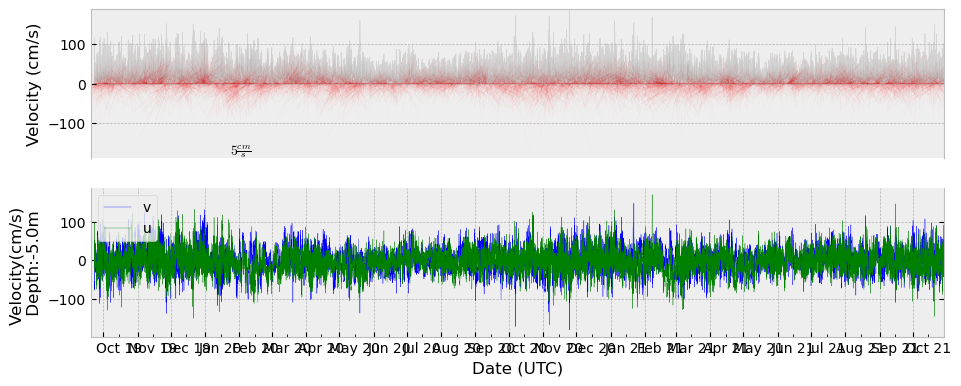

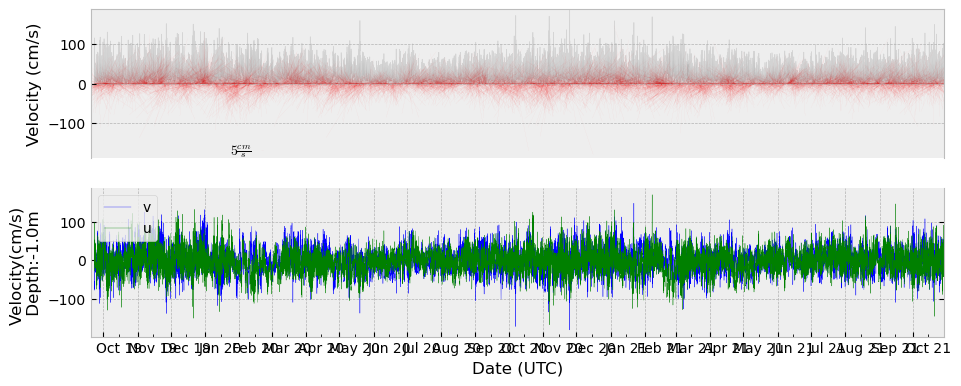

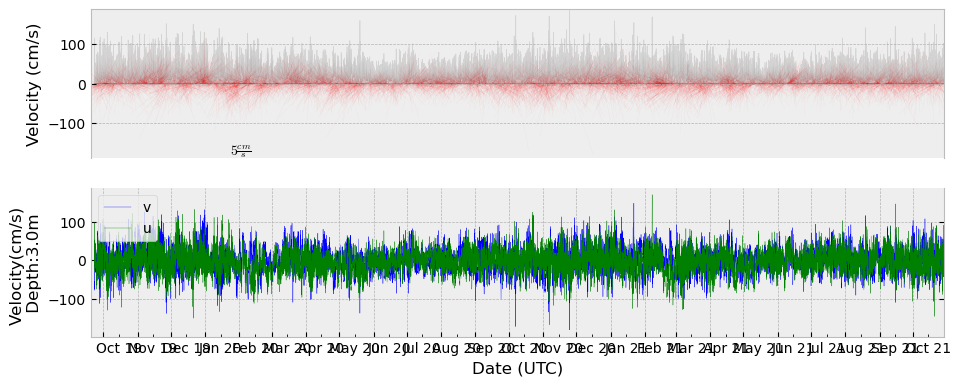

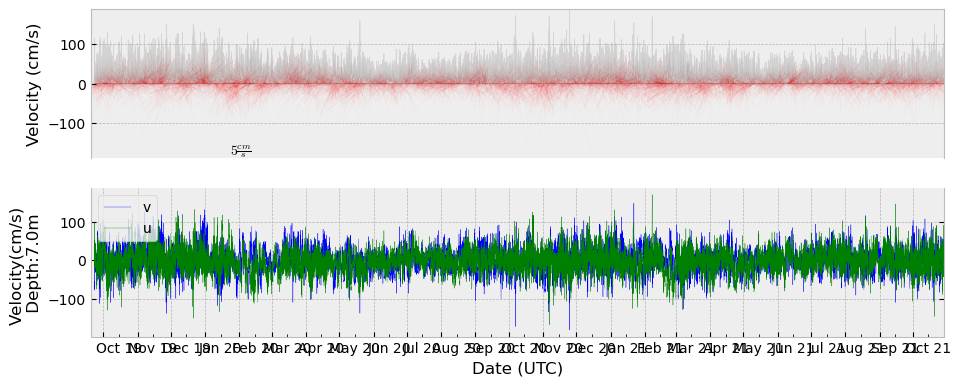

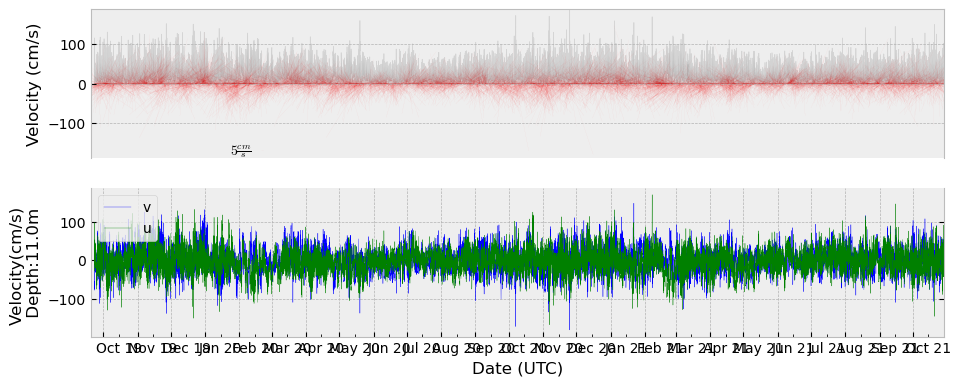

In [6]:
for i in range(0,len(xdf),1):
    try:
        p1 = TimeSeriesStickPlot.Timeseries1dStickPlot()
        plt1, fig1 = p1.plot(timedata=xdf.time, 
                         udata=xdf.isel(depth=1,latitude=0,longitude=0).u_curr_comp, 
                         vdata=xdf.isel(depth=1,latitude=0,longitude=0).v_curr_comp,
                         rotate=0,
                         ylabel = f'Velocity(cm/s) \n {xdf.isel(depth=i).depth.values}m ')
        plt1.ylabel(f'Velocity(cm/s) \n Depth:{xdf.isel(depth=i).depth.values}m ')
    except:
        pass

## BAsed on above plots - choose a relavant cutoff velocity (usually 100 or 500 cm/s)

In [7]:
xdf =xdf.where(xdf.u_curr_comp <=200,np.nan)
xdf

<xarray.Dataset>
Dimensions:          (latitude: 1, longitude: 1, time: 18423, depth: 18)
Coordinates:
  * time             (time) datetime64[ns] 2019-09-20 ... 2021-10-28T15:00:00
  * depth            (depth) float64 -17.0 -13.0 -9.0 -5.0 ... 43.0 47.0 51.0
  * latitude         (latitude) float64 59.9
  * longitude        (longitude) float64 -171.7
Data variables:
    u_curr_comp      (latitude, longitude, time, depth) float64 nan ... -6.531
    v_curr_comp      (latitude, longitude, time, depth) float64 nan ... 3.736
    w_curr_comp      (latitude, longitude, time, depth) float64 nan nan ... 0.2
    w_curr_comp_err  (latitude, longitude, time, depth) float64 nan nan ... 0.5
    agc1             (latitude, longitude, time, depth) float64 nan ... 140.0
    agc2             (latitude, longitude, time, depth) float64 nan ... 139.0
    agc3             (latitude, longitude, time, depth) float64 nan ... 135.0
    agc4             (latitude, longitude, time, depth) float64 nan ... 135.0
Attributes:
    Latitude_DegMMddW:                      59 54.220 N
    Longitude_DegMMddN:                     171 41.890 W
    MooringID:                              19BSP-5A
    platform_deployment_date:               2019-09-23T02:00:00Z
    platform_deployment_cruise_name:        DY1908
    platform_recovery_date:                 2022-09-06T16:00:00Z
    platform_recovery_cruise_name:          AQ2201
    platform_deployment_recovery_comments:  Pinged on DY2206 - strong signal
    WaterDepth:                             70.9
    date_created:                           2024-02-15T08:57:13Z
    date_modified:                          
    QC_indicator:                           unknown

In [8]:
# xdf['history'] = xdf.history + 'QC of high u/v values'

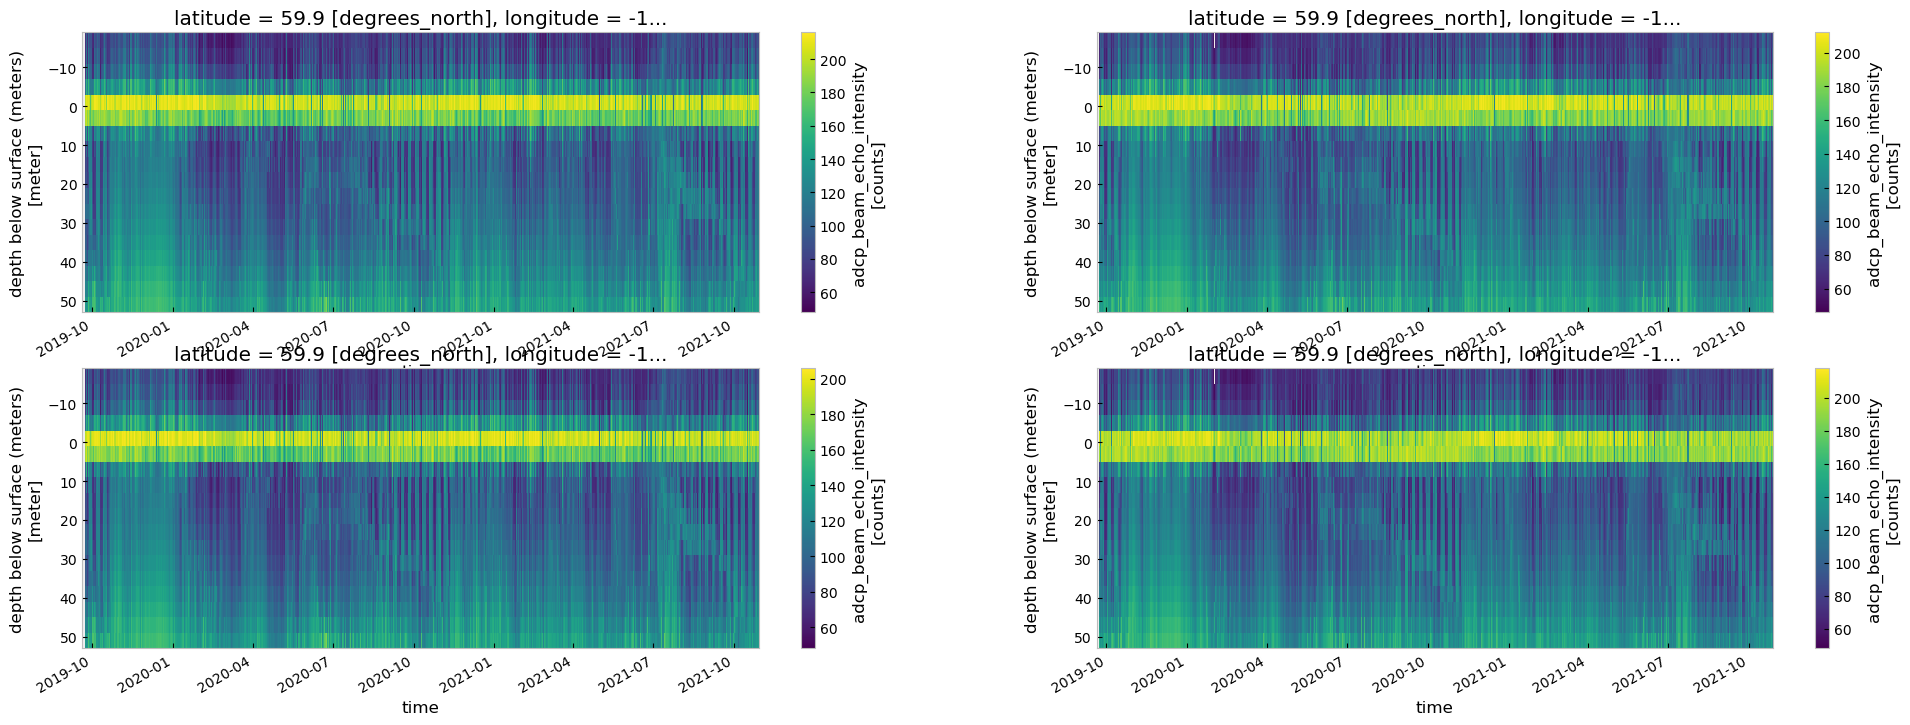

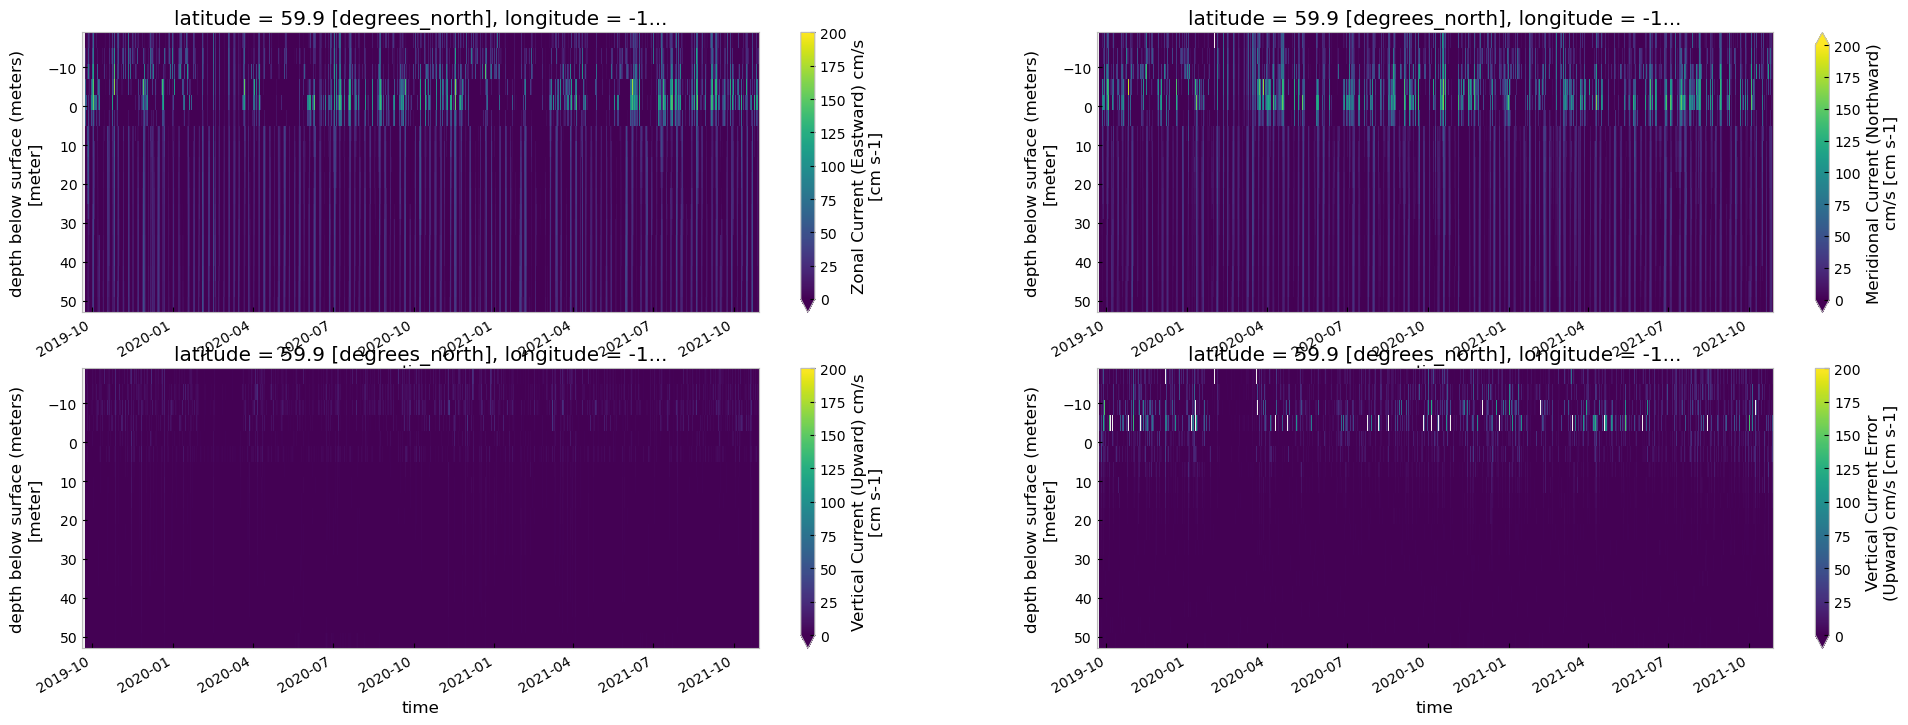

In [9]:
#optional plotting

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    xdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    xdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    xdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    xdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [10]:
try:
    xdf.attrs['history'] = xdf.attrs['history']+'  removed U,V >200cm/s'
except:
    xdf.attrs['history'] = '  removed U,V >200cm/s'    

## Trim above surface (negative values)

In [11]:
ixdf = xdf.where(xdf.depth >=-0.).dropna(how='all',dim='depth')

In [12]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  trimmed above surface'

In [13]:
ixdf.to_netcdf('19bsp5a_velein_0057m.trimmed.nc')

In [14]:
xdf = xa.load_dataset('19bsp5a_velein_0057m.trimmed.nc')

In [15]:
ixdf = xdf.interpolate_na(dim='time',use_coordinate=True,max_gap='2H')

In [16]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  linearly interpolated 1hour gaps'

In [17]:
ixdf = ixdf.interpolate_na(dim='depth',max_gap=2)

In [18]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  linearly interpolated 1 vertical bin'

## Interpolate over singleton missing gaps linearly

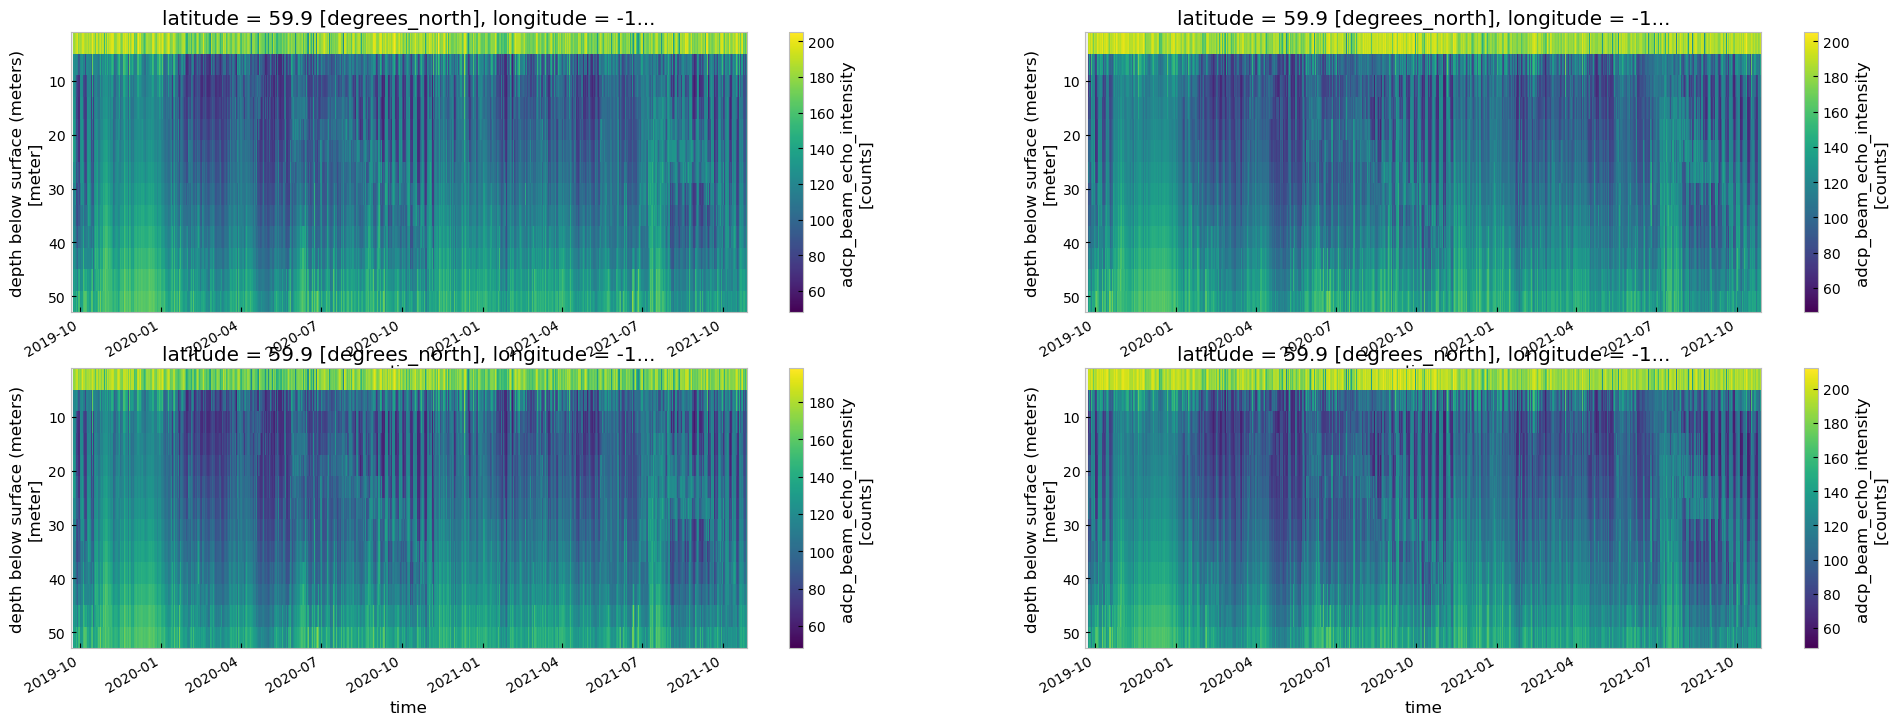

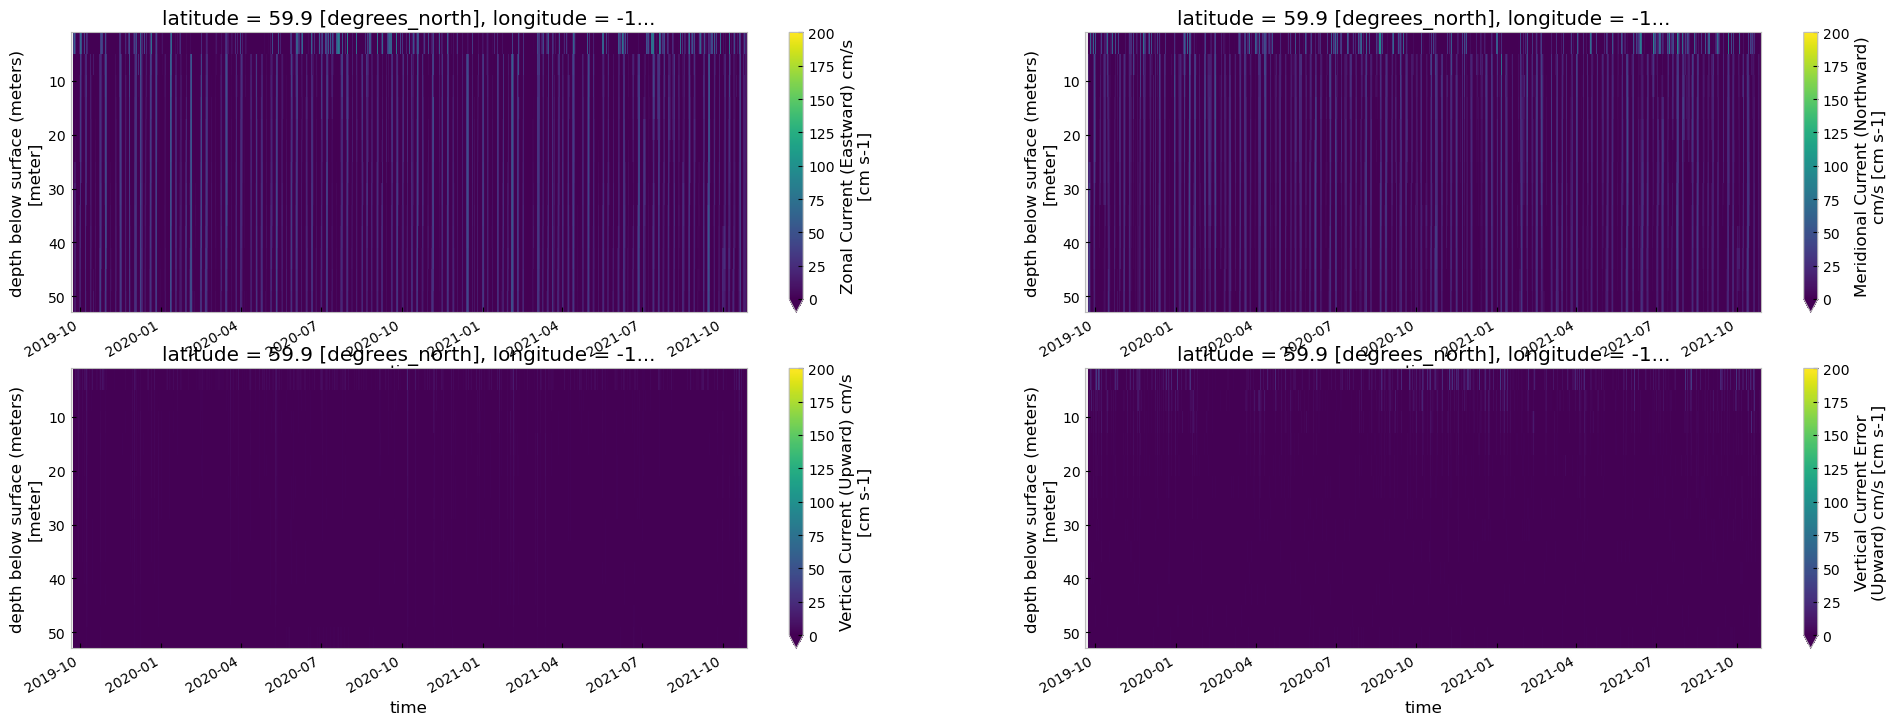

In [19]:

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    ixdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    ixdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    ixdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    ixdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [20]:
ixdf.to_netcdf('19bsp5a_velein_0057m.filtered.nc')